# Practical Data Analytics with Jupyter Notebooks -- Book
### This is another weekend project in the times of COVID-19, might as well be productive

#### Most of the intro is pretty basic. I have run through the pandas example to review data types

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/evolution_of_data_analysis.csv', header=0, sep="|")
df.head(2)

,Year,Decade,Milestone Title,Milestone Event,Why Important,Reference,People Process or Technology Tag
0,1945,1940s,ENIAC,First electronic general-purpose computer = ENIAC,Faster decisions using a computer and mathmatics,https://en.wikipedia.org/wiki/ENIAC,Technology
1,1945,1940s,John von Neumann / array,John von Neumann creates a merge sort algorith...,Arrays allow mathmatics| grouping and sorting ...,https://en.wikipedia.org/wiki/John_von_Neumann,People


In [3]:
df.groupby(['Decade']).agg({'Year':'count'})

,Year
Decade,
1940s,2
1950s,2
1960s,1
1970s,2
1980s,5
1990s,9
2000s,14
2010s,7


In [4]:
import sqlite3

In [5]:
conn = sqlite3.connect('./data/customer_sales.db')

In [6]:
df_customers = pd.read_sql_query("SELECT * from tbl_customers;",conn)
df_customers.head()

,Customer_ID,First_Name,Last_Name,Address_Line_1,Address_Line_2,City,State,ZipCode,Phone,Email
0,1,Johnny,Smith,123 Main Street,None,Miami,FL,12345,302-555-1212,jsmith@email.com
1,2,Debbie,Winner,31 Roundtree Lane,None,Dover,NJ,18888,None,debbie_winner@email.com
2,3,Seth,Winer,310 Roundtree Lane,None,Dover,NJ,18888,None,sw@email.com
3,4,Anthony,Leedessa,Dallas Drive,Unit 806,El Paso,TX,99928,None,alligator@email.com
4,5,Pete,Einstein,Morton Street,None,Philadelphia,PA,28373,215-555-1212,peter_einstein@email.com


In [7]:
pd.isnull(df_customers)

,Customer_ID,First_Name,Last_Name,Address_Line_1,Address_Line_2,City,State,ZipCode,Phone,Email
0,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,False,False,False,False


### starting section two

In [8]:
df_pr = pd.read_csv('./data/AAPL.csv', index_col=0, parse_dates=True)
df_pr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,155.582367,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,140.085220,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,146.065353,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.740265,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,148.518509,41025300


In [9]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Apple Stock Price')

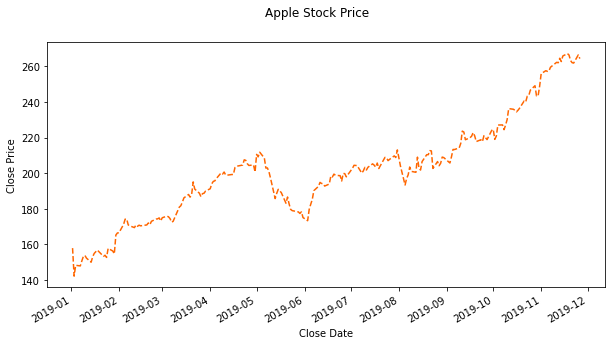

In [10]:
plt.figure(figsize=[10,5])
df_pr['Close'].plot(color='#FF6600', linewidth=1.5, linestyle='--')
plt.xlabel('Close Date')
plt.ylabel('Close Price')
plt.suptitle('Apple Stock Price')

(array([737060., 737091., 737119., 737150., 737180., 737211., 737241.,
        737272., 737303., 737333., 737364., 737394.]),
 <a list of 12 Text major ticklabel objects>)

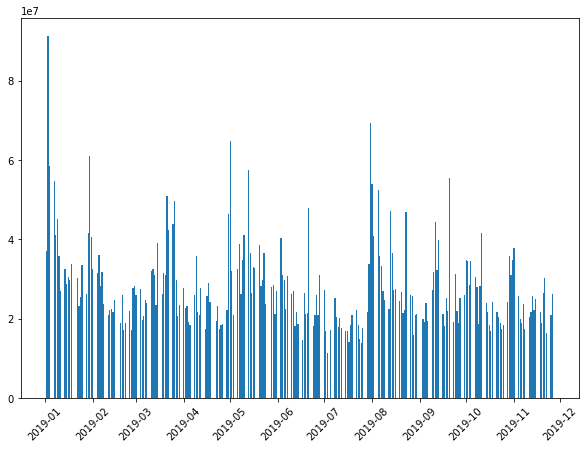

In [11]:
plt.figure(figsize=[10,7])
plt.bar(df_pr.index, df_pr['Volume'])
plt.xticks(rotation=45)

In [12]:
conn = sqlite3.connect('./data/user_hits.db')

In [13]:
df_churn = pd.read_sql_query("SELECT * FROM tbl_user_hits;", conn)
df_churn.head()

,userid,date
0,1.0,1/1/2017
1,2.0,1/2/2017
2,3.0,1/3/2017
3,4.0,1/1/2018
4,5.0,1/2/2018


In [14]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   userid  9 non-null      float64
 1   date    12 non-null     object 
dtypes: float64(1), object(1)
memory usage: 320.0+ bytes


In [15]:
df_churn.to_csv('./data/user_hits_export.csv')

In [16]:
df_u1 = df_churn[df_churn['userid'] == 1]
df_u1.sort_values(by='date', ascending=False)

,userid,date
6,1.0,1/1/2019
0,1.0,1/1/2017


In [17]:
df_churn_clean = pd.read_csv('./data/user_hits_binning_import.csv', parse_dates=['date'])
df_churn_clean.head()

,userid,date
0,1,2017-01-01
1,2,2017-01-02
2,3,2017-01-03
3,4,2018-01-01
4,5,2018-01-02


In [18]:
import datetime

In [19]:
now = pd.to_datetime('now')
now

Timestamp('2020-08-23 09:13:31.875662')

In [20]:
df_churn_clean['age'] = now - df_churn_clean['date']
df_churn_clean.head()

,userid,date,age
0,1,2017-01-01,1330 days 09:13:31.875662
1,2,2017-01-02,1329 days 09:13:31.875662
2,3,2017-01-03,1328 days 09:13:31.875662
3,4,2018-01-01,965 days 09:13:31.875662
4,5,2018-01-02,964 days 09:13:31.875662
